In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 1.5
plt.rcParams['font.size'] = 7.0
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{lmodern}']
plt.rcParams['axes.linewidth'] = 0.5

# grid
plt.rcParams['grid.linestyle'] = "solid"
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = "e0e0e0"

# axis ticks
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.size'] = 2.0
plt.rcParams['xtick.minor.size'] = 1.0
plt.rcParams['ytick.major.size'] = 2.0
plt.rcParams['ytick.minor.size'] = 1.0

# legend
plt.rcParams['legend.fontsize'] = "small"
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.handleheight'] = 0.5

In [4]:
data = pd.read_csv("parsed_eval_results.csv", index_col=0)

### Influence of Input Scale

#### Plot without timing information

In [5]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

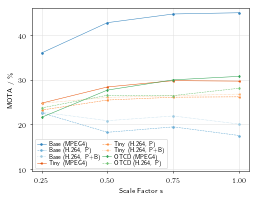

In [6]:
f, ax = plt.subplots(1, 1, figsize=(3.9,3))

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
ax.plot(baseline[mask]["scale"], baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
ax.plot(baseline[mask]["scale"], baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
ax.plot(baseline[mask]["scale"], baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.plot(deep_dense[mask]["scale"], deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))
mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.plot(deep_dense[mask]["scale"], deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))
mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
ax.plot(deep_dense[mask]["scale"], deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.plot(deep_upsampled[mask]["scale"], deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))
mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.plot(deep_upsampled[mask]["scale"], deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

leg = ax.legend(["Base (MPEG4)", "Base (H.264, P)", "Base (H.264, P+B)", "Tiny (MPEG4)", "Tiny (H.264, P)", 
                 "Tiny (H.264, P+B)", "OTCD (MPEG4)", "OTCD (H.264, P)"], ncol=2)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Scale Factor s")
ax.set_ylim([9.5, 46])
ax.set_xticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticks([10, 20, 30, 40])
ax.grid()
#plt.savefig("plot_scaling_factor.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Influence of Input Scale

In [9]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

#### Plot with offset removed

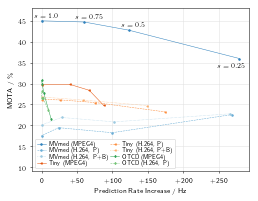

In [10]:
f, ax = plt.subplots(1, 1, figsize=(3.9,3))

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"] - deep_upsampled[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))

mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"] - deep_upsampled[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

leg = ax.legend(["MVmed (MPEG4)", "MVmed (H.264, P)", "MVmed (H.264, P+B)", "Tiny (MPEG4)", "Tiny (H.264, P)", 
           "Tiny (H.264, P+B)", "OTCD (MPEG4)", "OTCD (H.264, P)"], ncol=2)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Prediction Rate Increase / Hz")
ax.set_ylim([9.0, 48])
ax.set_xticks([0, 50, 100, 150, 200, 250])
ax.set_xticklabels(["0","+50","+100","+150","+200","+250"])
ax.grid()
ax.set_axisbelow(True)

# write text for scale values
plt.text(0.01, 0.945, r'$s = 1.0$', transform=ax.transAxes)
plt.text(0.2, 0.94, r'$s = 0.75$', transform=ax.transAxes)
plt.text(0.41, 0.89, r'$s = 0.5$', transform=ax.transAxes)
plt.text(0.85, 0.64, r'$s = 0.25$', transform=ax.transAxes)

#plt.savefig("plot_scaling_factor.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

#### Bar Plot

In [7]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

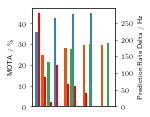

In [8]:
f, ax = plt.subplots(1, 1, figsize=(1.5,1.8))
ax1_cp = ax.twinx()

cmap = cm.get_cmap('tab20c')

xs = np.array([0.25, 0.5, 0.75, 1.0])
spacer = np.array([0.0, 0.2, 0.2, 0.2])
width = 0.1

# MPEG4
# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.bar(xs*3, baseline[mask]["MOTA"]*100.0, width=width, color=cmap(0))
ax1_cp.bar(xs*3+width, relative_predict_fps_mean, width=width, color='r')

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.bar(xs*3+xs[0]+spacer, deep_dense[mask]["MOTA"]*100.0, width=width, color=cmap(4))
ax1_cp.bar(xs*3+xs[0]+width+spacer, relative_predict_fps_mean, width=width, color='r')

# OTC T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"] - deep_upsampled[mask]["predict_fps_mean"].iloc[-1]
ax.bar(xs*3+xs[1]+spacer, deep_upsampled[mask]["MOTA"]*100.0, width=width, color=cmap(8))
ax1_cp.bar(xs*3+xs[1]+width+spacer, relative_predict_fps_mean, width=width, color='r')

# H264, P
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
#ax.bar(xs*3+xs[0], baseline[mask]["MOTA"]*100.0, width=width, color=cmap(1))

# H264, P+B
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
#ax.bar(xs*3+xs[1], baseline[mask]["MOTA"]*100.0, width=width, color=cmap(2))

ax.set_ylabel("MOTA / \%")
ax1_cp.set_ylabel("Prediction Rate Delta / Hz")
ax.set_xticks([])

#plt.savefig("plot_scaling_factor_2.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()